<h1>Human Activity Recongnition<h1>

This project is used to build a model to classify the human activities such as walking, walking_upstairs, walking_downstairs, sleeping, standing, sitting.
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years.    
The data is recorded with the help of accelorometer and gyroscope via smart phone attached to the waists of the person. The experiments have been video-recorded to label the data manually.The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

Attribute information

For each record in the dataset the following is provided:

* Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

* Triaxial Angular velocity from the gyroscope.

* A 561-feature vector with time and frequency domain variables.

* Its activity label.

* An identifier of the subject who carried out the experiment.

* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


In [102]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [85]:
train_har=pd.read_csv('F://train_har.csv')
test_har=pd.read_csv('F://test_har.csv')

In [86]:
columns = train_har.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train_har.columns = columns
test_har.columns = columns

C:\Users\user\Anaconda4\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
C:\Users\user\Anaconda4\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
C:\Users\user\Anaconda4\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [87]:
train_har.info(), test_har.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAccmeanX to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAccmeanX to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


(None, None)

In [88]:
#check for nan or null values
print('No of NaN/Null values in train: {}'.format(train_har.isnull().values.sum()))
print('No of NaN/Null values in test: {}'.format(test_har.isnull().values.sum()))

No of NaN/Null values in train: 0
No of NaN/Null values in test: 0


In [89]:
#check for duplicates
print('No of duplicates in train: {}'.format(sum(train_har.duplicated())))
print('No of duplicates in test : {}'.format(sum(test_har.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


</h>check for data imbalance for all the six classes</h>

In [96]:
train_har["Activity"].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [97]:
test_har["Activity"].value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

In [115]:
train_har['subject'].groupby(train_har['subject']).count()

subject
1     347
3     341
5     302
6     325
7     308
8     281
11    316
14    323
15    328
16    366
17    368
19    360
21    408
22    321
23    372
25    409
26    392
27    376
28    382
29    344
30    383
Name: subject, dtype: int64

In [90]:
train_har

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


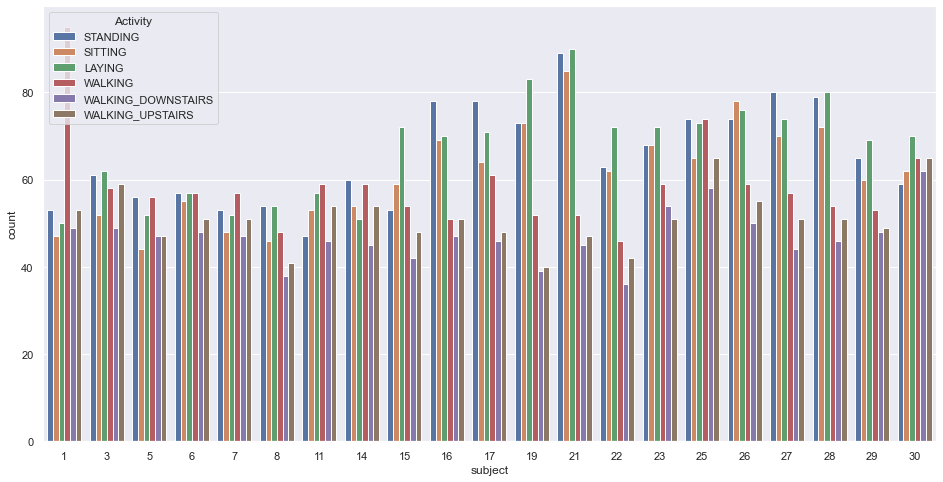

In [93]:
plt.figure(figsize=(16,8))
sns.countplot(x='subject',hue='Activity', data = train_har)
plt.show()

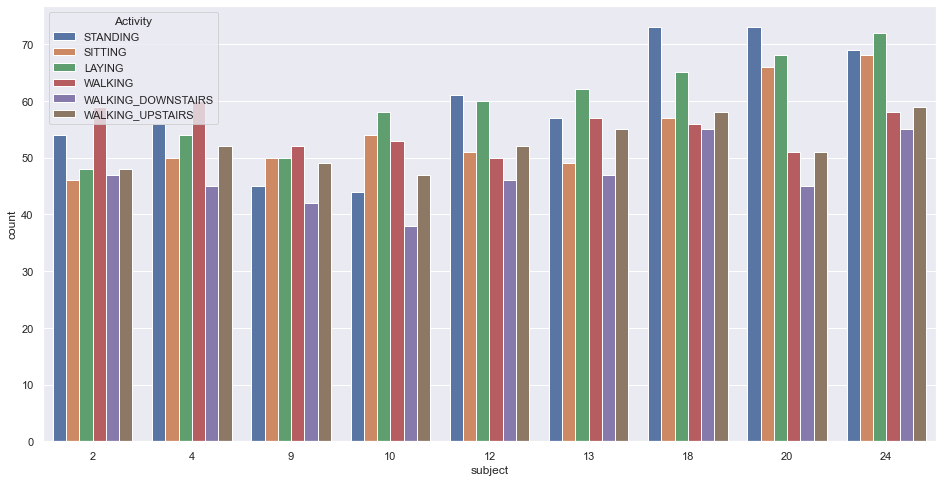

In [116]:
plt.figure(figsize=(16,8))
sns.countplot(x='subject',hue='Activity', data = test_har)
plt.show()

C:\Users\user\Anaconda4\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


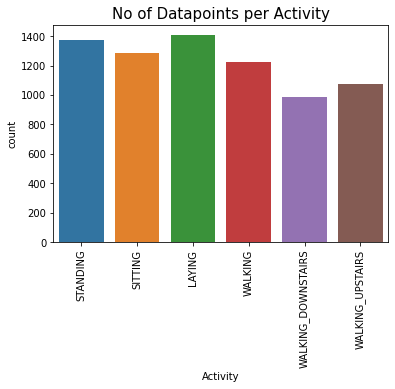

In [9]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train_har.Activity)
plt.xticks(rotation=90)
plt.show()

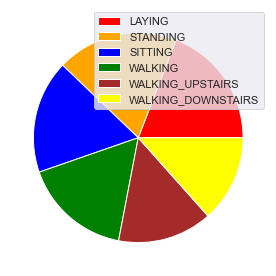

In [100]:
activities = train_har["Activity"].value_counts()
labels = activities.index
values = activities.values

colors = ['red','orange', 'blue', 'green','brown', 'yellow']
patches, texts = plt.pie(values, colors=colors)
plt.legend(patches, labels)
plt.tight_layout()
plt.show()

In [99]:
# printing all the column data
for col in train_har.columns:
    print(col)

tBodyAccmeanX
tBodyAccmeanY
tBodyAccmeanZ
tBodyAccstdX
tBodyAccstdY
tBodyAccstdZ
tBodyAccmadX
tBodyAccmadY
tBodyAccmadZ
tBodyAccmaxX
tBodyAccmaxY
tBodyAccmaxZ
tBodyAccminX
tBodyAccminY
tBodyAccminZ
tBodyAccsma
tBodyAccenergyX
tBodyAccenergyY
tBodyAccenergyZ
tBodyAcciqrX
tBodyAcciqrY
tBodyAcciqrZ
tBodyAccentropyX
tBodyAccentropyY
tBodyAccentropyZ
tBodyAccarCoeffX1
tBodyAccarCoeffX2
tBodyAccarCoeffX3
tBodyAccarCoeffX4
tBodyAccarCoeffY1
tBodyAccarCoeffY2
tBodyAccarCoeffY3
tBodyAccarCoeffY4
tBodyAccarCoeffZ1
tBodyAccarCoeffZ2
tBodyAccarCoeffZ3
tBodyAccarCoeffZ4
tBodyAcccorrelationXY
tBodyAcccorrelationXZ
tBodyAcccorrelationYZ
tGravityAccmeanX
tGravityAccmeanY
tGravityAccmeanZ
tGravityAccstdX
tGravityAccstdY
tGravityAccstdZ
tGravityAccmadX
tGravityAccmadY
tGravityAccmadZ
tGravityAccmaxX
tGravityAccmaxY
tGravityAccmaxZ
tGravityAccminX
tGravityAccminY
tGravityAccminZ
tGravityAccsma
tGravityAccenergyX
tGravityAccenergyY
tGravityAccenergyZ
tGravityAcciqrX
tGravityAcciqrY
tGravityAcciqrZ
tGravit

C:\Users\user\Anaconda4\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\Anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda4\lib\site-packages\seaborn\distributions.py:2619: FutureWarni

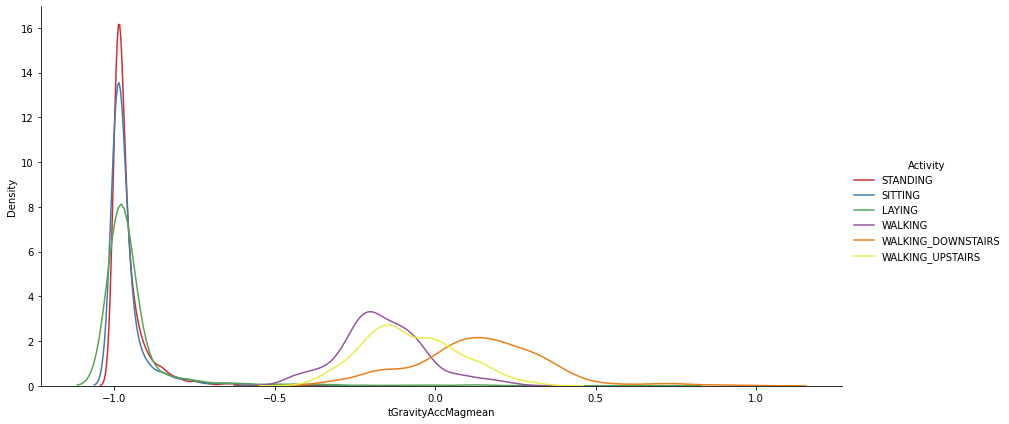

In [11]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train_har, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tGravityAccMagmean', hist=False)\
    .add_legend()
plt.show()

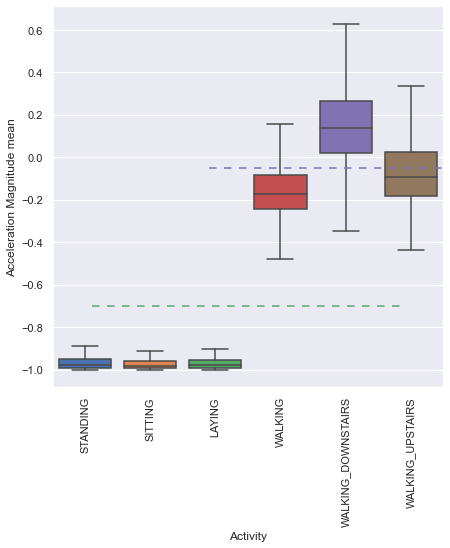

In [82]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='tGravityAccMagmean',data=train_har, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

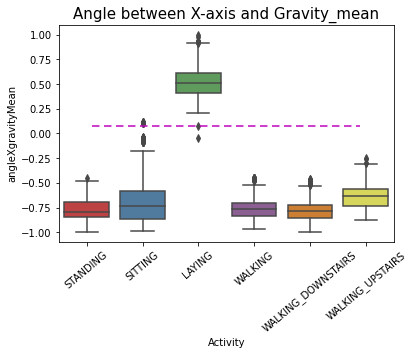

In [13]:
sns.boxplot(x='Activity', y='angleXgravityMean', data=train_har)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

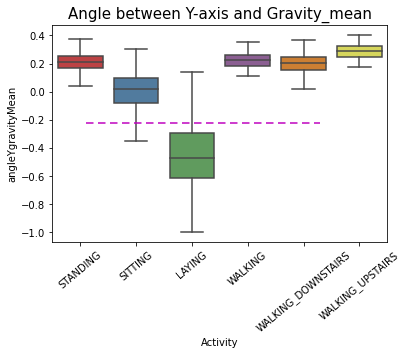

In [14]:
sns.boxplot(x='Activity', y='angleYgravityMean', data = train_har, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

As we can see in the above diagrams, the moving and stationary activities can be easily separted using an if else statement.

In [15]:
x_train= train_har.drop(['subject', 'Activity'], axis=1)
x_test=test_har.drop(['subject', 'Activity',], axis=1)

y_train= train_har.Activity
y_test=test_har.Activity

In [16]:
X= pd.concat([x_train, x_test])
Y=pd.concat([y_train, y_test])

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#Fit the model
logreg = LogisticRegression(C=20)
logreg.fit(x_train,y_train)
#Generate predictions with the model using our X values
y_pred = logreg.predict(x_test)
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[537   0   0   0   0   0]
 [  0 426  63   0   0   2]
 [  0  14 518   0   0   0]
 [  0   0   0 490   3   3]
 [  0   0   0   5 407   8]
 [  0   0   0  26   8 437]]


C:\Users\user\Anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\user\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


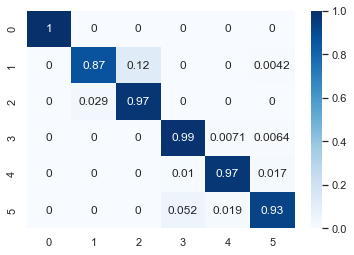

In [18]:
sns.set(font_scale=1.0)
sns.heatmap(cf_matrix / cf_matrix.astype(np.float).sum(axis=1), annot=True, cmap='Blues')
plt.show()

In [19]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [20]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, Y)
    clf.predict(x_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,logistic_regression,0.96291,{'C': 10}


The best parameters fetching the highest accuracy is C=10, and the best score is 0.9692.